In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_html, display, Math, HTML
from scipy.stats import norm
from scipy.stats import uniform
from numpy.random import default_rng

# Parameter Estimation: Maximum Likelihood Estimation

### Review Parameter Estimation: Model Fitting

__Model fitting__ is finding the parameter(s) $\theta$ of a distribution $p(x; \theta)$ given that we know some data from it.

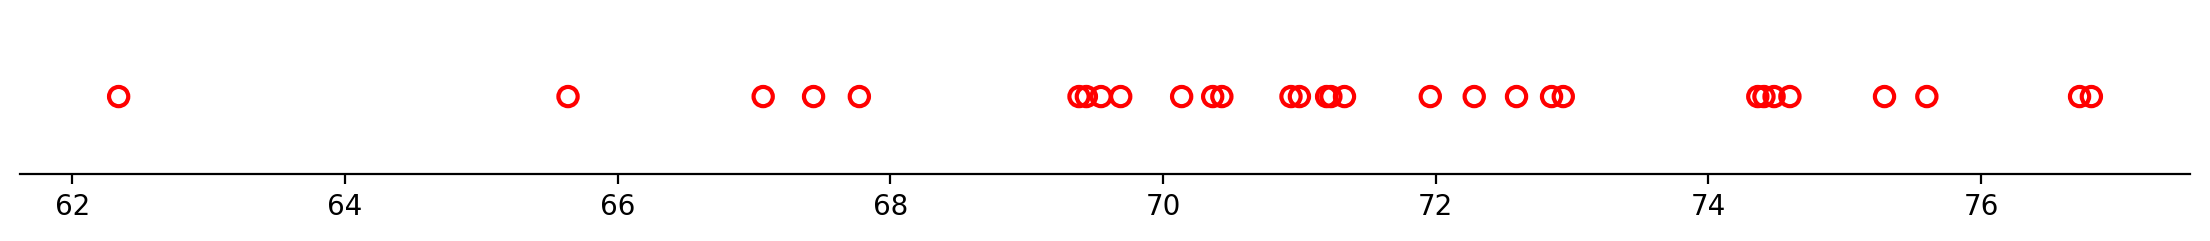

In [2]:
from scipy.stats import norm
from scipy.stats import uniform
from numpy.random import default_rng

# specify the parameters
mu = 70 
sig = 3
#
samp_size = 30
rng = 0

fig, ax = plt.subplots(1, 1, figsize = (14,1))

# sample
samp_x = norm.rvs(size = samp_size, loc = mu, scale = sig, random_state = rng)
samp_y = [1 for x in samp_x]
ax.scatter(samp_x, samp_y, marker = 'o', facecolors='none', edgecolors='red', linewidths = 1.5, s = 48)
#ax.set_xlim(xmin, xmax)
#ax.set_title('height [inches]')
ax.yaxis.set_visible(False)
# remove the "box" around the plot
for spine in [list(ax.spines.values())[i] for i in [0, 1, 3]]:
    spine.set_visible(False)

| Distribution | Parameters $\theta$ |
| --- | --- | 
|Bernoulli   | $p$ |
|Binomial    | $(N,p)$ |
|Poisson     | $\lambda$ |
|Geometric   | $p$ |
|Exponential | $\lambda$ |
|Uniform     | $(a,b)$ |
|Normal      | $(\mu, \sigma)$ |

When we think of $p(x; \theta)$ as a function of $\theta$ (instead of $x$) we call it a __likelihood__.

If $ X = \{x^{(1)},x^{(2)}, \dots, x^{(m)}\} $ is a sample consisting of $m$ data items drawn independently from $p(x;\theta)$, then the corresponding likelihood function is equal to
$$p(X;\theta) = p\left(x^{(1)},x^{(2)}, \dots, x^{(m)};\theta \right) = p(x^{(1)}; \theta)p(x^{(2)}; \theta)\dots p(x^{(m)}; \theta)= \prod_{i=1}^{m}  p\left(x^{(i)}; \theta\right).$$

Here, $\prod$ denotes a product. For example, the product of two numbers $a_1$ and $a_2$ <br> (i.e., $a_1 a_2$), can be written as $\prod_{i=1}^2 a_i$.

Since $p\left(x^{(i)}; \theta\right)$ is a value between 0 and 1, $p(X;\theta)= \prod_{i=1}^{m}  p\left(x^{(i)}; \theta\right)$ is very small. To avoid working with small numbers, we use the log of the likelihood:
$$ \log p\left(X; \theta \right) = \log \prod_{i=1}^m p\left(x^{(i)}; \theta\right) = \sum_{i=1}^m \log p\left(x^{(i)}; \theta \right).$$

<center>
    
<img src="images/natural_log.png" width="500px"> 
  
</center>

First part of model fitting: computing the log-likelihood function.<br>
Second part of model fitting: computing the estimate(s) of the parameter(s).

## The Maximum Likelihood Principle

We have seen some examples of estimators for parameters in the first lecture on parameter estimation. But where do estimators come from exactly?  

Rather than making guesses about what might be a good estimator, we'd like a principle that we can use to derive good estimators for different models.

The most common principle is the maximum likelihood principle.

The __Maximum Likelihood Estimate (MLE)__ of $\theta$ is that value of $\theta$ that maximizes the likelihood - that is, makes the observed data "most probable" or "most likely".

Formally, we say that the __maximum likelihood estimator__ for $\theta$ is:
    
$$ \hat {\theta}_{\text{ML}} = \arg \max_\theta p(X; \theta), $$

which for a dataset of $m$ items is:
    
$$ \hat {\theta}_{\text{ML}} = \arg \max_\theta \prod_{i=1}^m p(x^{(i)}; \theta). $$ 

This is the same thing as maximizing the log-likelihood:
    
$$ \hat \theta_{\text{ML}} = \arg \max_\theta \log p(X; \theta) = \arg \max_\theta \sum_{i=1}^m \log p(x^{(i)}; \theta). $$

We will drop the ML subsript in the remaining part of the lecture.

__Question__. Why can we maximize the log-likelihood function instead of the likelihood function?

Since $\log$ is a monotonic function, the likelihood function and the log-likehood function have maxima in the same location.

Illustration of this property for a general (i.e., not likehood function) function $f(x)$ and its natural logarithm $g(x) = \log f(x)$:
<center>
    
<img src="images/natural_log_max.png" width="500px"> 
  
</center>

__Example__. Looking back at the deaths-by-horse-kick data, we can see that there is clearly a maximum in the plot of the log-likelihood function, somewhere between 0.5 and 1.  

If we use the value of $\theta = \lambda$ at the maximum, we are choosing to set $\lambda$ to __maximize the (log-)likelihood of the data under the model.__

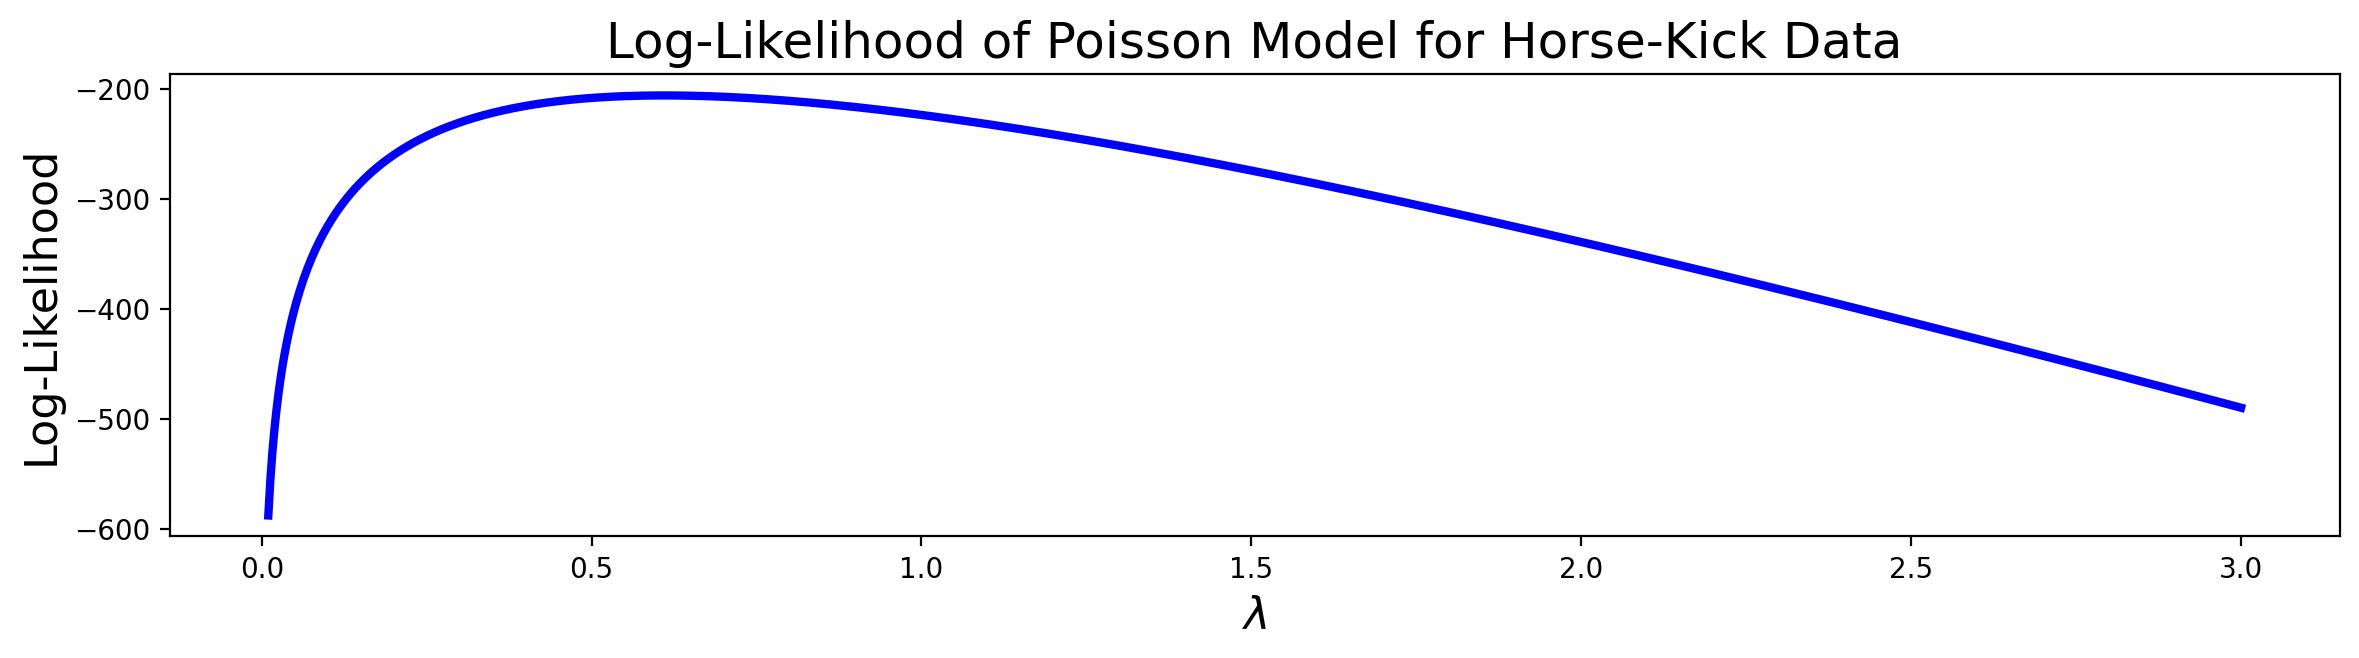

In [17]:
from scipy.stats import poisson

# note that this data is available in 'data/HorseKicks.txt'
horse_kicks = pd.DataFrame(
data = np.array([
[0, 108.67, 109],
[1, 66.29, 65],
[2, 20.22, 22],
[3, 4.11, 3],
[4, 0.63, 1],
[5, 0.08, 0],
[6, 0.01, 0]]),
columns = ["Deaths Per Year","Predicted Instances (Poisson)","Observed Instances"])
horse_kicks["Deaths Per Year"] = horse_kicks["Deaths Per Year"].astype('int')
horse_kicks["Observed Instances"] = horse_kicks["Observed Instances"].astype('int')
horse_kicks[["Deaths Per Year","Observed Instances"]].style.hide(axis='index')

# assumes data is a list of counts for various values starting at zero
def ll(data, lam):
    return np.sum(data * poisson.logpmf(range(len(data)), lam))

xvals = np.linspace(0.01, 3, 1000)
ll_vals = [ll(horse_kicks['Observed Instances'], xval) for xval in xvals]

fig, ax = plt.subplots(1, 1, figsize = (14,3))
plt.plot(xvals, ll_vals, lw = 3, color = 'blue')
plt.ylabel('Log-Likelihood', size = 16)
plt.xlabel(r'$\lambda$', size = 16)
plt.title('Log-Likelihood of Poisson Model for Horse-Kick Data', size = 18);

### Computation of MLE

Often, the MLE is found using calculus by locating a critical point:

$$\frac{\partial}{\partial \theta} \log p(X; \theta) = 0 \text{ and } \frac{\partial^2 }{\partial \theta^2}\log p(X; \theta)<0.$$

<center>
    
<img src="images/second_derivative_test.png" width="600px"> 
  
</center>

The computation of the second derivatives becomes reduntant when the graph of the log-likelihood function is available and confirms that the critical point is indeed a maximum.

The table below shows some useful properties of the derivatives.

|||
| --- | --- | 
|Natural logarithm | $\frac{d}{dx}\log x = \frac{1}{x}$ |
|Product rule | $\frac{d}{dx}(uv) = u\frac{dv}{dx} + v\frac{du}{dx}$ |
|Quotient rule | $\frac{d}{dx}\left(\frac{u}{v}\right) = \frac{v\:du/dx\:-\:u\:dv/dx}{v^2}$ |
|Chain rule| $\frac{d}{dx}z(y(x)) = \frac{dz}{dy}\frac{dy}{dx}$ |

__Question__. What is the derivative of $\log(1-x)$?

a. $(1-x)^{-1}$ <br>
b. $-\frac{1}{\log(x)}$ <br>
c. $-(1-x)^{-1}$

__Answer__. c

### Summary of the computational steps

The steps to find Maximum Likelihood Estimate $\hat{\theta}$ for distribution parameter $\theta$:

 1. Compute the likehood function $p\left(X;\theta \right).$<br>
 2. Compute the corresponding log-likelihood function $\log p\left(X;\theta \right).$<br>
 3. Take the derivative of the log-likelihood function w.r.t. with respect to $\theta$.<br>
 4. Set the derivative to zero to find the MLE. <br>
 4. (Optional) Confirm that the obtained extremum is indeed a maximum by taking the second derivative or from the plot of the log-likelihood function. 

## Consistency

The maximum likelihood estimator has a number of properties that make it the preferred way to estimate parameters whenever possible.   

In particular, under appropriate conditions, the MLE is __consistent__, meaning that as the number of data items grows large, the estimate converges to the true value of the parameter.

It can also be shown that for large $m$, no consistent estimator has a lower MSE than the maximum likelihood estimator.

__Example__.

Previously we looked at the following problem:

Suppose that $x$ is a discrete random variable with the probability mass function shown below.

| $x$ | $0$ | $1$ | $2$ | $3$ |
| :---: | :---: | :---: | :---: | :---: |
| $p(x;\theta)$ | $\frac{2}{3}\theta$ | $\frac{1}{3}\theta$| $\frac{2}{3}\left(1-\theta\right)$| $\frac{1}{3}\left(1-\theta\right)$|

Here $0\leq \theta \leq 1$ is a parameter. The following 10 independent observations were taken from this distribution:

$$X = \{3,0,2,1,3,2,1,0,2,1\}.$$

Before we found the corresponding log-likelihood function. This time we want to go a step further and find the MLE for $\theta$.

We know that the likelihood function is equal to

$$p(X;\theta) = \prod_{i=1}^{10}  p\left(x^{(i)}; \theta\right)=\left( \frac{2}{3}\theta \right)^2 \left( \frac{1}{3}\theta \right)^3 \left(\frac{2}{3}\left(1-\theta\right)\right)^3 \left(\frac{1}{3}\left(1-\theta\right)\right)^2.$$

This function is not easy to maximize. Let us look at the log-likelihood function.

The log-likelihood function is given by

$$\log p(X;\theta) = \sum_{i=1}^{10}\log p\left(x^{(i)};\theta \right) = 5\log \theta + 5\log (1-\theta) + 5\log\frac{2}{9}.$$

The derivative of the log-likelihood function with respect to $\theta$ is equal to

$$\frac{\partial}{\partial\theta}\log p(X;\theta) = \frac{5}{\theta} - \frac{5}{1-\theta}.$$

Setting the derivative to zero leads to

$$5(1-\theta) - 5\theta=0,$$

$$1-2\theta=0.$$

This suggests that the MLE for $\theta$ is potentially $\hat{\theta}=\frac{1}{2}.$ 

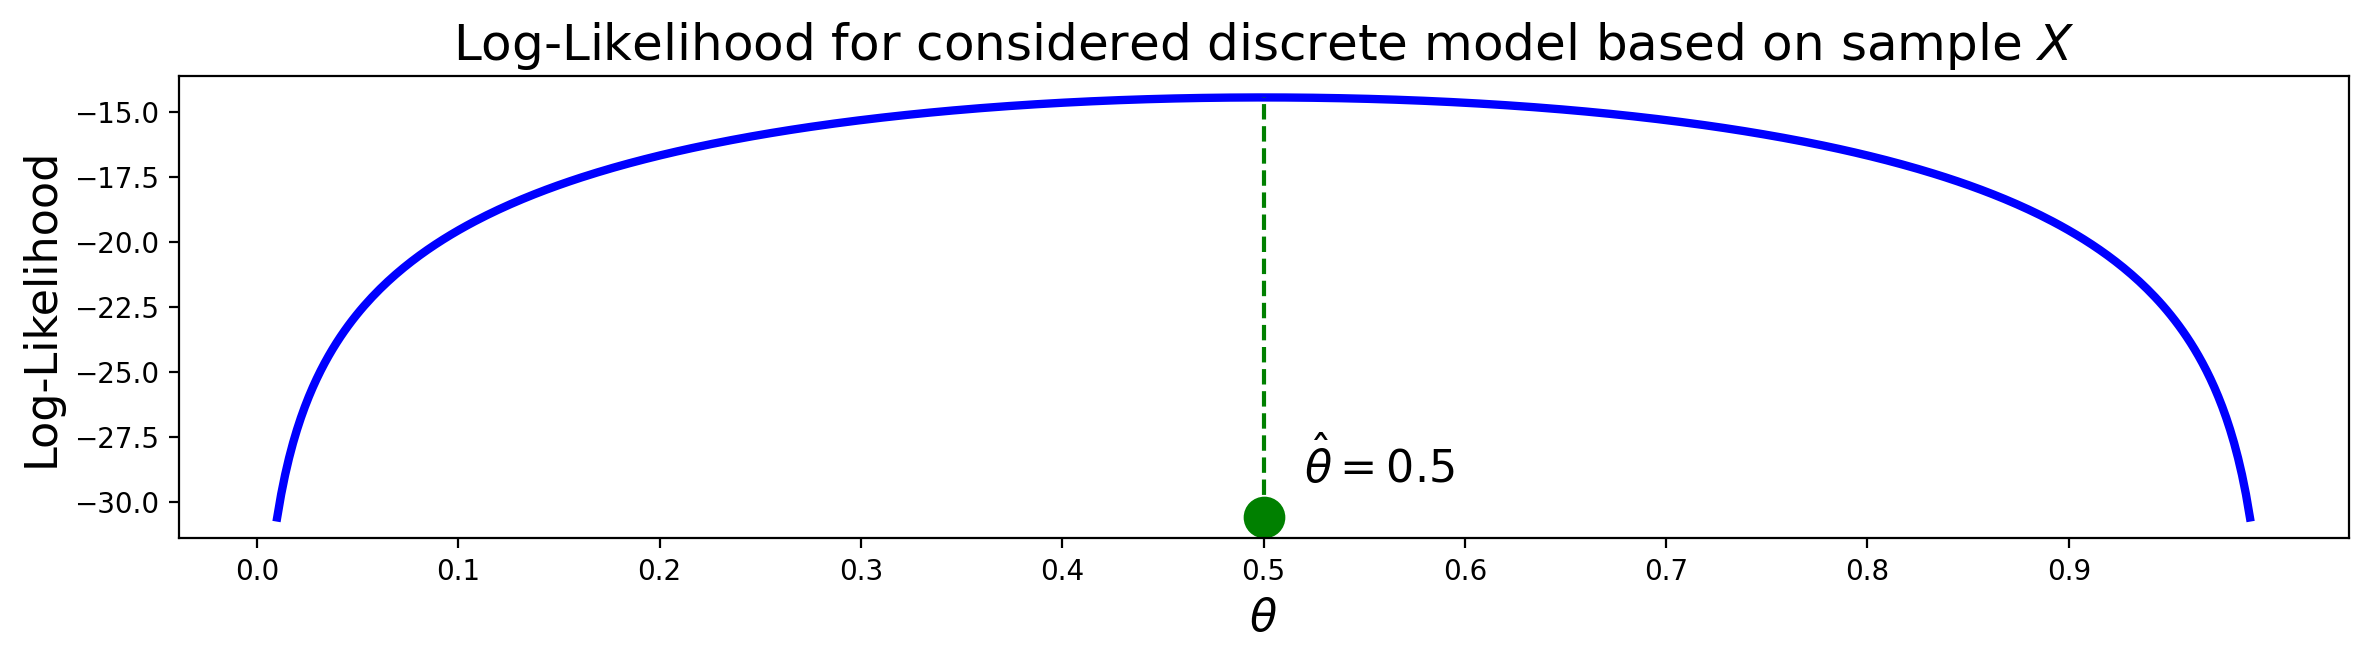

In [4]:
def loglik(theta):
    return 5*np.log(theta)+5*np.log(1-theta)+5*np.log(2/9)

fig = plt.figure(figsize = (14,3))
ax = plt.axes()

x = np.linspace(0.01, 0.99, 500)
ax.plot(x, loglik(x), lw = 3, color = 'blue')
ax.set_xlabel(r'$\theta$', size = 16)
ax.set_ylabel('Log-Likelihood', size = 16);
ax.set_xticks(np.arange(0, 1, 0.1))
plt.title(r'Log-Likelihood for considered discrete model based on sample $X$', size = 18);

mle = 0.5
ymin = np.min(loglik(x))
ymax = np.max(loglik(x))
plt.vlines(x = mle, ymin = ymin, ymax = ymax, linestyles = 'dashed', color = 'g')
plt.plot(mle, ymin, 'o', color = 'g', markersize = 14, clip_on = False)
plt.text(mle+0.02, ymin+1, r'$\hat{\theta} = 0.5$', size = 16, ha = 'left', va = 'bottom')
plt.show()

The figure shows that $\hat{\theta}=\frac{1}{2}$ is a maximum. Therefore, the MLE of $\theta$ is indeed $\frac{1}{2}.$

__Question__. Suppose that $x$ is a discrete random variable with the probability mass function given by

| $x$ | $1$ | $2$ |
| :---: | :---: | :---: |
| $p(x;\theta)$ | $\theta$ | $1-\theta$|

Three independent oservations are made from this distribution:

$$x^{(1)} = 1, x^{(2)} = 2, x^{(3)} = 2.$$

We found earlier that the likelihood function in this case is $p(X;\theta)=\theta (1-\theta)^2$.
Thus, the log-likelihood function is equal to

$$\log p(X;\theta) = \log \theta + 2\log (1-\theta).$$

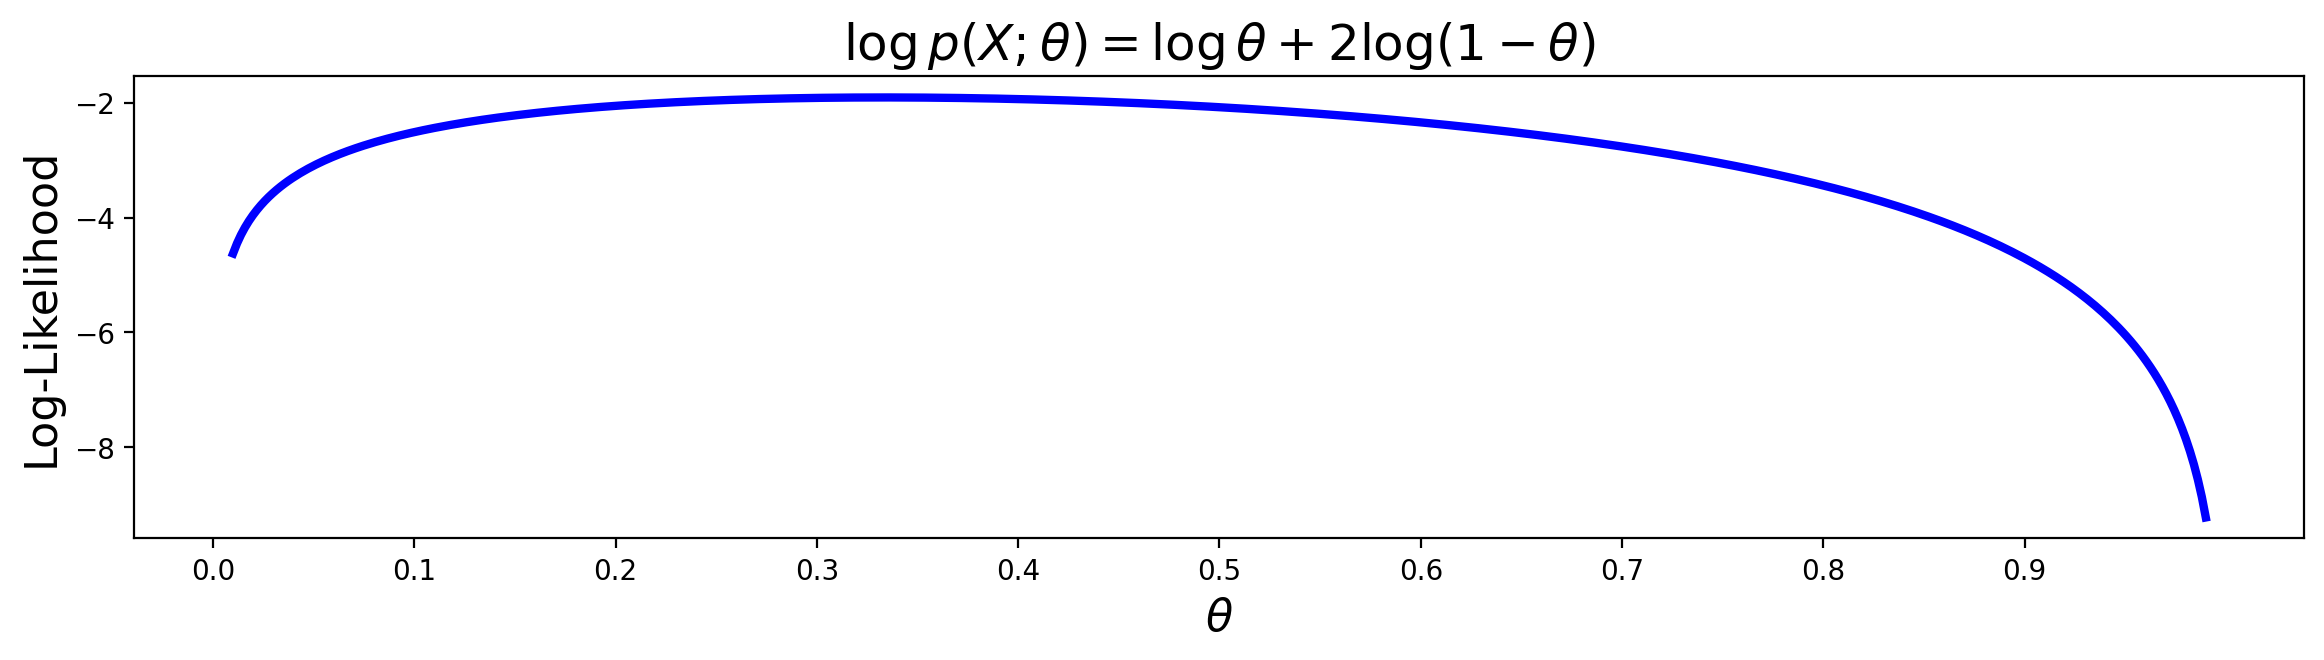

In [5]:
def qloglik(theta):
    return np.log(theta)+2*np.log(1-theta)

fig = plt.figure(figsize = (14,3))
ax = plt.axes()

x = np.linspace(0.01, 0.99, 500)
ax.plot(x, qloglik(x), lw = 3, color = 'blue')
ax.set_xlabel(r'$\theta$', size = 16)
ax.set_ylabel('Log-Likelihood', size = 16);
ax.set_xticks(np.arange(0, 1, 0.1))
plt.title(r'$\log p(X;\theta) = \log \theta + 2\log (1-\theta)$', size = 18);
plt.show()

What is the maximum likelihood estimator of $\theta$? Compute your answer using the derivative of $\log p(X;\theta) = \log \theta + 2\log (1-\theta).$

a. $\hat{\theta} = \frac{1}{4} $ <br>
b. $\hat{\theta} =\frac{1}{3} $ <br>
c. $\hat{\theta} = 1 $ <br>
d. $\hat{\theta} =\frac{1}{5} $

__Answer__. b

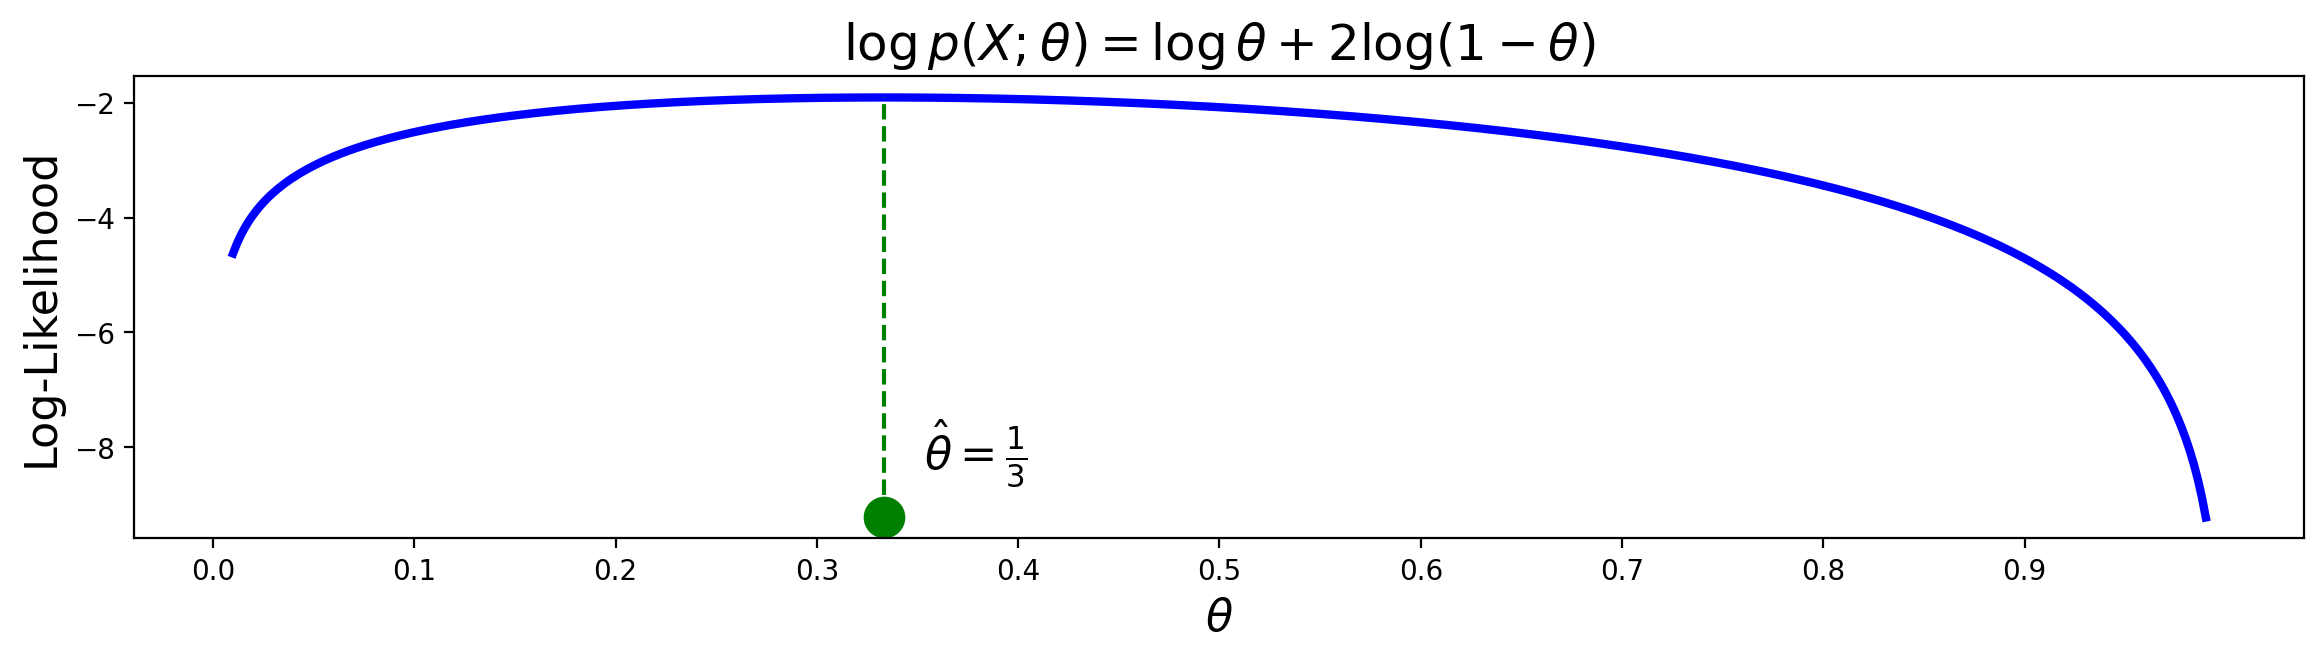

In [6]:
fig = plt.figure(figsize = (14,3))
ax = plt.axes()

x = np.linspace(0.01, 0.99, 500)
ax.plot(x, qloglik(x), lw = 3, color = 'blue')
ax.set_xlabel(r'$\theta$', size = 16)
ax.set_ylabel('Log-Likelihood', size = 16);
ax.set_xticks(np.arange(0, 1, 0.1))
plt.title(r'$\log p(X;\theta) = \log \theta + 2\log (1-\theta)$', size = 18);

mle = 1/3
ymin = np.min(qloglik(x))
ymax = np.max(qloglik(x))
plt.vlines(x = mle, ymin = ymin, ymax = ymax, linestyles = 'dashed', color = 'g')
plt.plot(mle, ymin, 'o', color = 'g', markersize = 14, clip_on = False)
plt.text(mle+0.02, ymin+0.5, r'$\hat{\theta} = \frac{1}{3}$', size = 16, ha = 'left', va = 'bottom')
plt.show()

__Example.__ 

Let's revisit the Bortkeiwicz's horse-kick data as well. Recall that Bortkeiwicz had collected deaths by horse-kick in the Prussian army over a span of 200 years, and was curious whether they occurred at a constant, fixed rate.

In [7]:
# note that this data is available in 'data/HorseKicks.txt'
horse_kicks = pd.DataFrame(
data = np.array([
[0, 108.67, 109],
[1, 66.29, 65],
[2, 20.22, 22],
[3, 4.11, 3],
[4, 0.63, 1],
[5, 0.08, 0],
[6, 0.01, 0]]),
columns = ["Deaths Per Year","Predicted Instances (Poisson)","Observed Instances"])
horse_kicks["Deaths Per Year"] = horse_kicks["Deaths Per Year"].astype('int')
horse_kicks["Observed Instances"] = horse_kicks["Observed Instances"].astype('int')
horse_kicks[["Deaths Per Year","Observed Instances"]].style.hide(axis='index')

Deaths Per Year,Observed Instances
0,109
1,65
2,22
3,3
4,1
5,0
6,0


Previously we started fitting the data to a Poisson distribution. We found that the likelihood function is given by

$$p(X;\lambda) = \prod_{i=1}^{m} \lambda^{x^{(i)}} \frac{e^{- \lambda}}{x^{(i)}!}.$$

__Question__. What is the value of $m$ in the above expression?

__Answer__. $m=200,$ because it represents the number of data points.

From the likelihood function we obtained the log-likehood function:

$$\log p(X; \lambda) = \log \left( \prod_{i=1}^{m} \lambda^{x^{(i)}} \frac{e^{- \lambda}}{x^{(i)}!} \right) = \sum_{i=0}^m \left( x^{(i)} \log \lambda - \lambda - \log x^{(i)}!\right).$$

To find the maximum of the log-likelihood of the data as a function of $\lambda$, we need to compute the derivative w.r.t. $\lambda$:

$$ \frac{\partial}{\partial\lambda}\log p(X; \lambda) = \frac{\partial}{\partial\lambda} \sum_{i=0}^m \left( x^{(i)} \log \lambda - \lambda - \log x^{(i)}!\right)$$

$$=\sum_{i=0}^m \left(x^{(i)} \frac{1}{\lambda} - 1 \right)
= \frac{1}{\lambda}\sum_{i=0}^m x^{(i)} - m. $$

Setting the derivative to zero, we get 

$$\frac{1}{{\lambda}}\sum_{i=0}^m x^{(i)} - m = 0,$$

$${\lambda} = \frac{1}{m}\sum_{i=0}^m x^{(i)}.$$

This is just the mean of the data, that is, the average number of deaths per year! From the available data we can compute that the mean is 0.61. The plot confirms that 0.61 is indeed a maximum. Therefore, the MLE of $\lambda$, $\hat{\lambda}$ = 0.61.

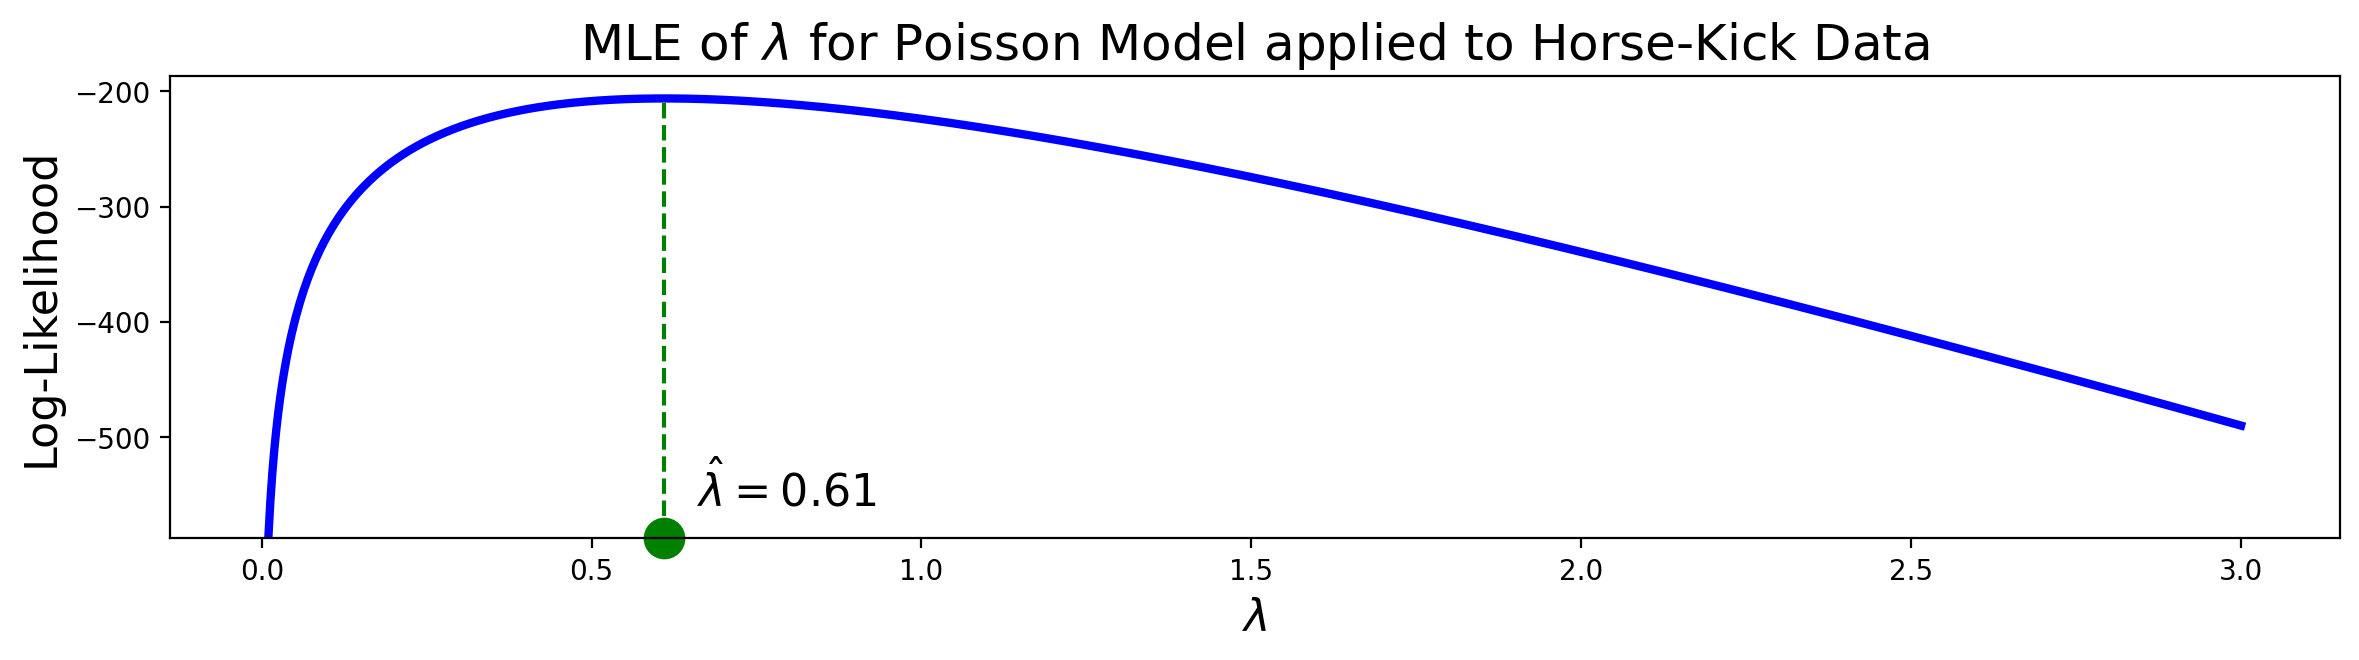

In [9]:
from scipy.stats import poisson

# assumes data is a list of counts for various values starting at zero
def ll(data, lam):
    return np.sum(data * poisson.logpmf(range(len(data)), lam))

xvals = np.linspace(0.01, 3, 1000)
ll_vals = [ll(horse_kicks['Observed Instances'], xval) for xval in xvals]

mle = np.sum((horse_kicks['Observed Instances'] 
    * np.array(range(len(horse_kicks['Observed Instances'])))) /
       np.sum(horse_kicks['Observed Instances']))

fig, ax = plt.subplots(1, 1, figsize = (14,3))
plt.plot(xvals, ll_vals, lw = 3, color = 'blue')

ymin = np.min(ll_vals)
ax.set_ylim(ymin = ymin)
mle_ll = np.sum(horse_kicks['Observed Instances'] *  
                     poisson.logpmf(range(len(horse_kicks['Observed Instances'])), mle))
plt.vlines(x = mle, ymin = ymin, ymax = mle_ll, linestyles = 'dashed', color = 'g')
plt.plot(mle, ymin, 'o', color = 'g', markersize = 14, clip_on = False)
plt.text(mle+0.05, ymin+20, r'$\hat{\lambda} = 0.61$', size = 16, ha = 'left', va = 'bottom')

plt.ylabel('Log-Likelihood', size = 16)
plt.xlabel(r'$\lambda$', size = 16)
plt.title('MLE of $\lambda$ for Poisson Model applied to Horse-Kick Data', size = 18);

The plot confirms that 0.61 is indeed a maximum. Therefore, the MLE for $\lambda$, $\hat{\lambda}$ = 0.61.

Using this estimate for $\lambda$, we can ask what the expected number of deaths per year would be, if deaths by horse-kick really followed the assumptions of the Poisson distribution (ie, happening at a fixed, constant rate):

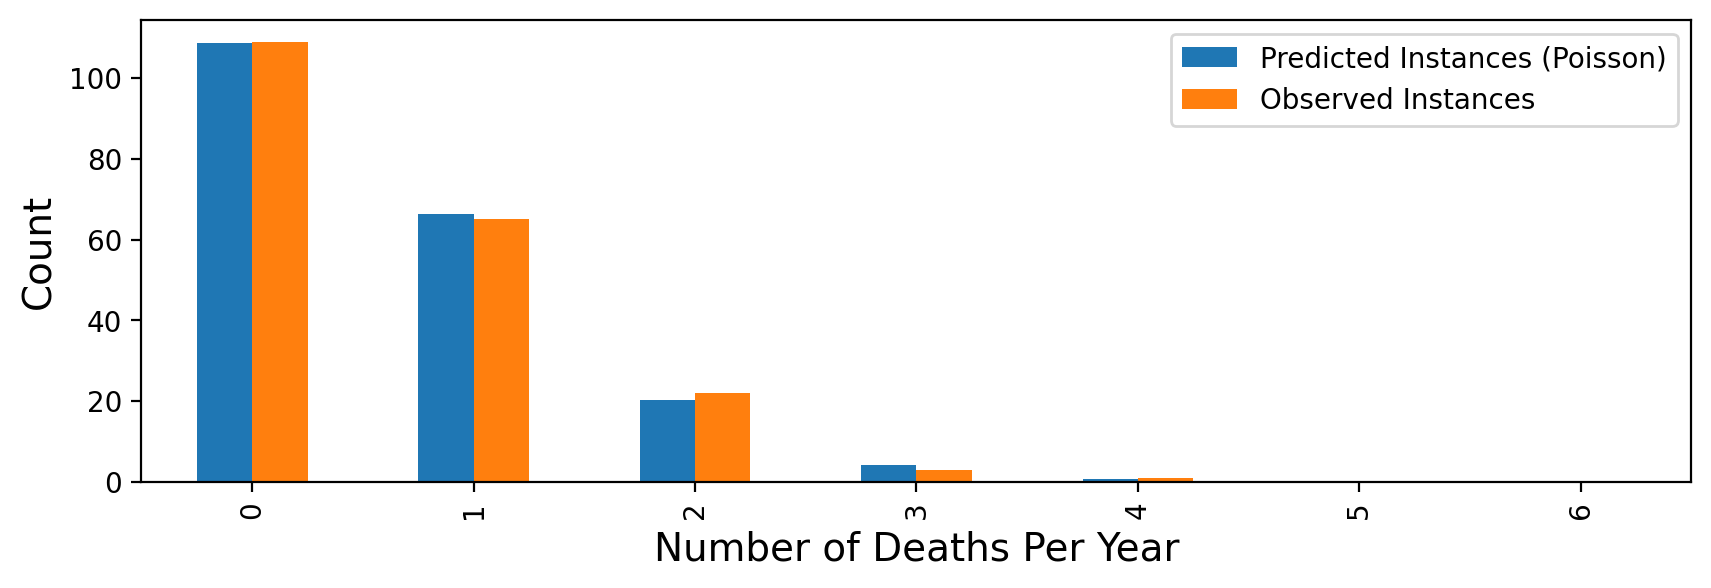

In [10]:
horse_kicks[["Predicted Instances (Poisson)","Observed Instances"]].plot.bar(figsize = (10,3))
plt.xlabel("Number of Deaths Per Year", size=14)
plt.ylabel("Count", size=14);

Which shows that the Poisson model is indeed a very good fit to the data!

From this, Bortkeiwicz concluded that there was nothing particularly unusual about the years when there were many deaths by horse-kick.  They could be just what is expected if deaths occurred at a constant rate.

__Example__. 

We also had looked at sample data $X =\{x^{(1)}, \dots, x^{(m)}\}$ from a normal distribution $N(\mu,\sigma^2)$ with $\mu$ and $\sigma$ unknown. To fit the data to a normal distribution both $\mu$ and $\sigma$ have to be estimated.

We found previously that the likelihood function is equal to

$$p\left(X; \mu, \sigma\right)= \left(\frac{1}{\sigma \sqrt{2\pi}}\right)^m \exp\left(\sum_{i=1}^m -\frac{1}{2}\left(\frac{x^{(i)} - \mu}{\sigma} \right)^2 \right),$$

while the log-likelihood function is given by

$$\log p\left(X; \mu, \sigma \right) = -m\log \sigma - \frac{m}{2}\log(2\pi) -\frac{1}{2\sigma^2}\sum_{i=1}^m \left(x^{(i)} - \mu \right)^2.$$

Replacing the constant term by $c$ we can write the log-likehood as

$$\log p\left(X; \mu, \sigma \right) = -m\log \sigma -\frac{1}{2\sigma^2}\sum_{i=1}^m \left(x^{(i)} - \mu \right)^2+c.$$

The partials with respect to $\mu$ and $\sigma$ are 

$$\frac{\partial}{\partial \mu} \log p\left(X; \mu, \sigma \right) = - \frac{1}{2\sigma^2}\sum_{i=1}^m 2(-1)\left(x^{(i)}-\mu\right) = \frac{1}{\sigma^2}\sum_{i=1}^m \left(x^{(i)}-\mu\right),$$

$$\frac{\partial}{\partial \sigma} \log p\left(X; \mu, \sigma \right) = -\frac{m}{\sigma} + \frac{1}{\sigma^3}\sum_{i=1}^m \left(x^{(i)} - \mu \right)^2.$$

We assume that $\sigma>0$ and set the first partial derivative to zero:

$$\frac{1}{\sigma^2}\sum_{i=1}^m \left(x^{(i)}-\mu\right)=0 \Leftrightarrow \sum_{i=1}^m x^{(i)} - m\mu = 0 \Leftrightarrow \mu = \frac{1}{m}\sum_{i=1}^m x^{(i)}.$$

Thus, $\hat{\mu}$ is the sample mean.

To find an estimate for the standard deviation we use $\hat{\mu}$ and set the second partial derivative to zero. Since $\sigma>0$, we obtain 

$$-\frac{m}{\sigma} + \frac{1}{\sigma^3}\sum_{i=1}^m \left(x^{(i)} - \hat{\mu} \right)^2=0 \Leftrightarrow \frac{1}{\sigma^2}\sum_{i=1}^m \left(x^{(i)} - \hat{\mu} \right)^2=m \Leftrightarrow \sigma = \sqrt{\left(\frac{1}{m}\sum_{i=1}^m \left(x^{(i)} - \hat{\mu} \right)^2\right)},$$

where $\hat{\mu}$ is the sample mean.

Thus, the potential MLE for $\mu$ and $\sigma$ are

$$\hat{\mu} = \frac{1}{m}\sum_{i=1}^m x^{(i)},$$

$$\hat{\sigma} = \sqrt{\left(\frac{1}{m}\sum_{i=1}^m \left(x^{(i)} - \hat{\mu} \right)^2\right)}.$$

The upcoming Python example will illustrate that the above $\hat{\mu}$ and $\hat{\sigma}$ are indeed maxima and hence are the MLE for $\mu$ and $\sigma$ of $N(\mu,\sigma^2)$.  

### Python example
We look at a sample of size 100 from a normal distribution. The log-likelihood function can be created in the following way.

In [11]:
from scipy.stats import norm
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D, art3d
from matplotlib.patches import Circle

# create data sample
# population parameters
mu = 4
sigma = 1

# sample size
samp_size = 100

rng = 0
data = norm.rvs(size = samp_size, loc = mu, scale = sigma, random_state = rng)

In [12]:
# log-likelihood function for a normal distribution
# input: sample, parameters' domains
def normloglik(X,muV,sigmaV):
    m = len(X)
    return -m/2*np.log(2*np.pi) - m*np.log(sigmaV)\
    - (np.sum(np.square(X))- 2*muV*np.sum(X)+m*muV**2)/(2*sigmaV**2)

The MLE for $\mu$ and $\sigma$ can be computed using the mean and var functions from NumPy.

In [13]:
# MLE for the mean and the standard deviation
mu_hat  = np.mean(data)
sig_hat = np.sqrt(np.var(data, axis = 0, ddof = 0))
llik    = normloglik(data, mu_hat, sig_hat)

In [14]:
# select parameters' domains
vec_mu    = np.arange(3, 5, 0.01)
vec_sigma = np.arange(0.5, 3, 0.01)

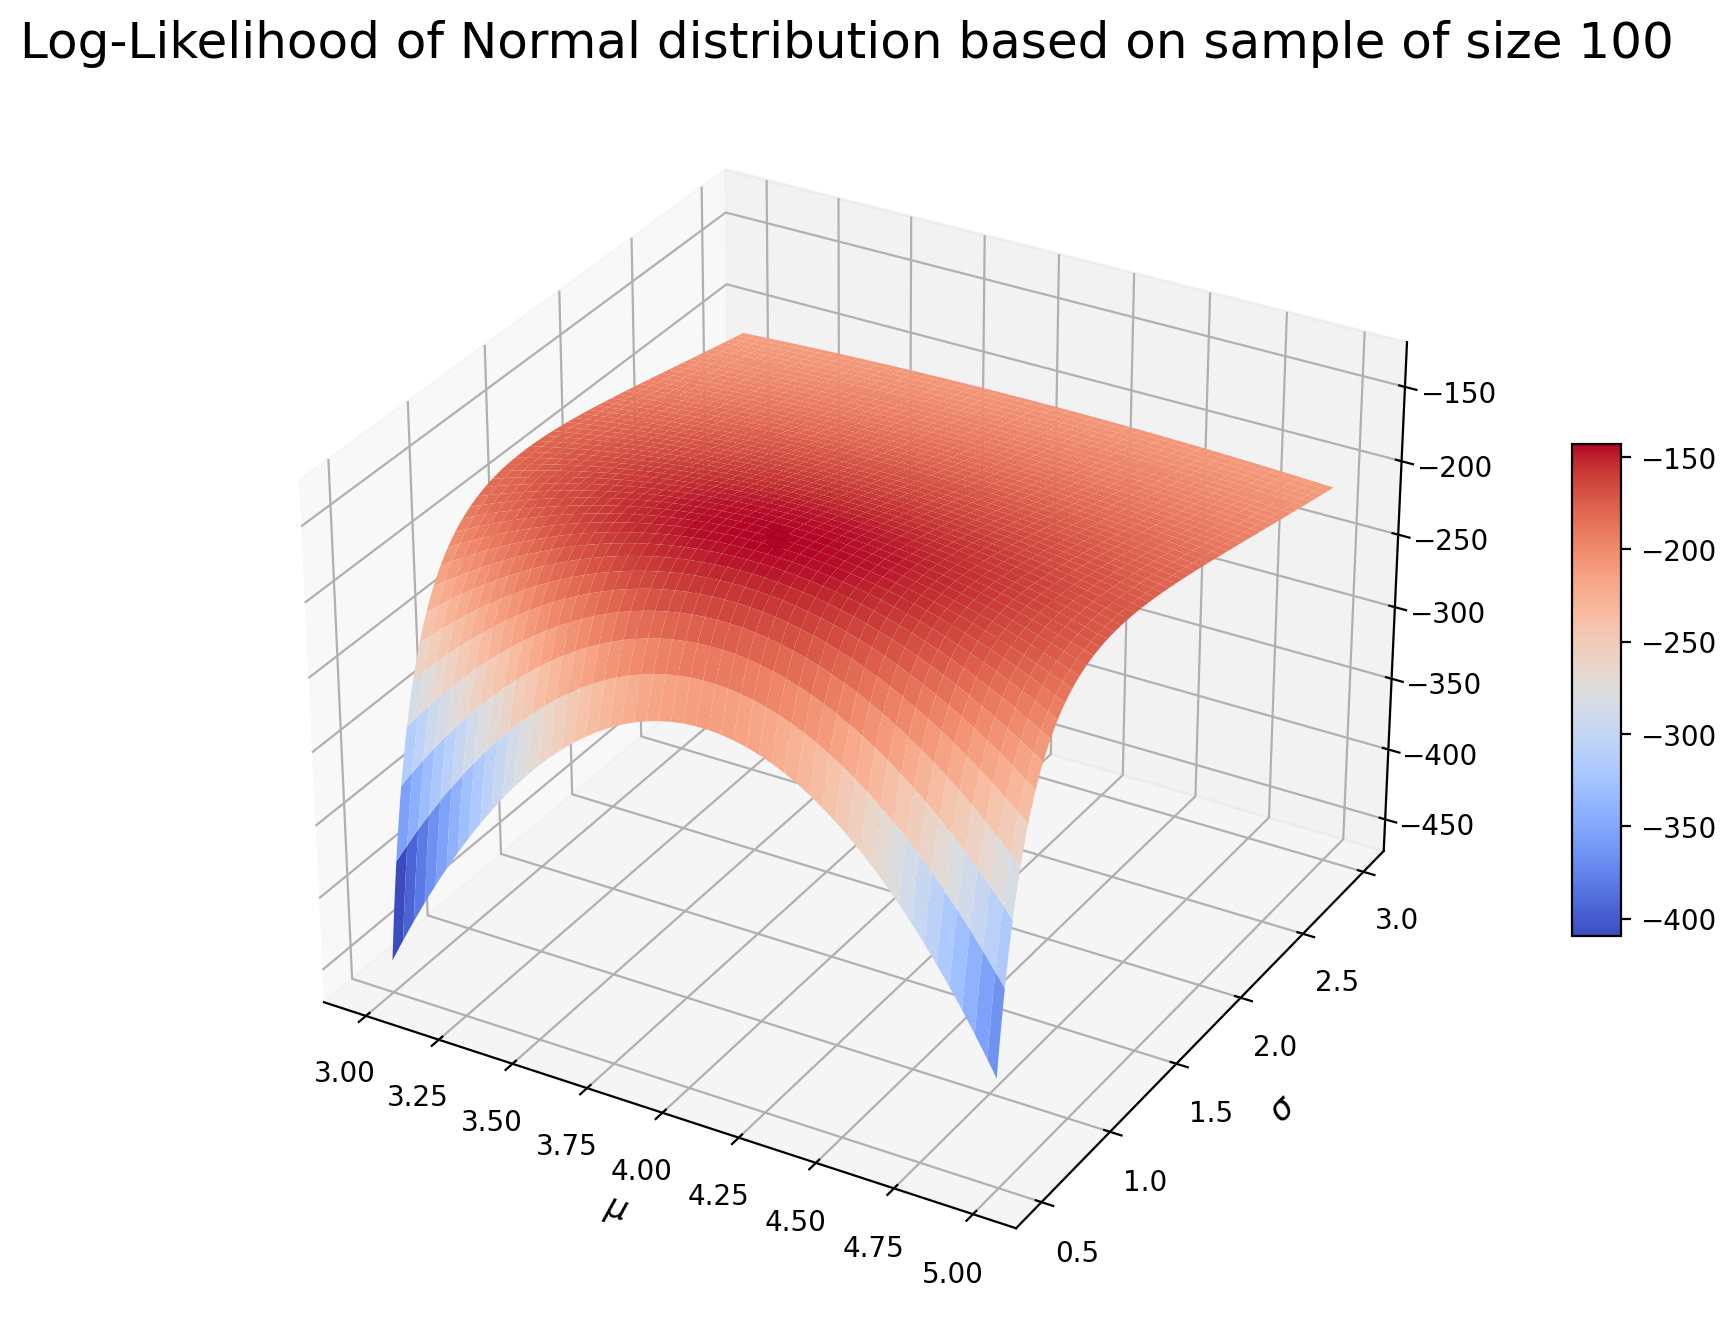

In [15]:
# make a surface plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(14, 8))

x,y = np.meshgrid(vec_mu, vec_sigma)
z = normloglik(data,x,y)

# plot the surface
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, alpha=1)
ax.set_xlabel('$\mu$',size=12)
ax.set_ylabel('$\sigma$',size=12)

# add the MLEs
ax.scatter(mu_hat, sig_hat, llik,  c='k', s=55, depthshade=False, alpha = 1)
#ax.text(mu_hat, sig_hat, llik+20, r'$(\hat{\mu},\hat{\sigma})$', color='black')

# add a color bar
fig.colorbar(surf, shrink=0.4, aspect=10)

plt.title('Log-Likelihood of Normal distribution based on sample of size 100', size = 18);
plt.savefig('llik_norm.jpg')
plt.show()

We can visualize the MLE on the surface plot.
<center>

<img src="images/llik_norm.jpg" width="750px">
       
</center>

Alternatively, if one of the parameters is known, we visualize the log-likelihood as function of the unknown parameter and indicate the computed MLE.

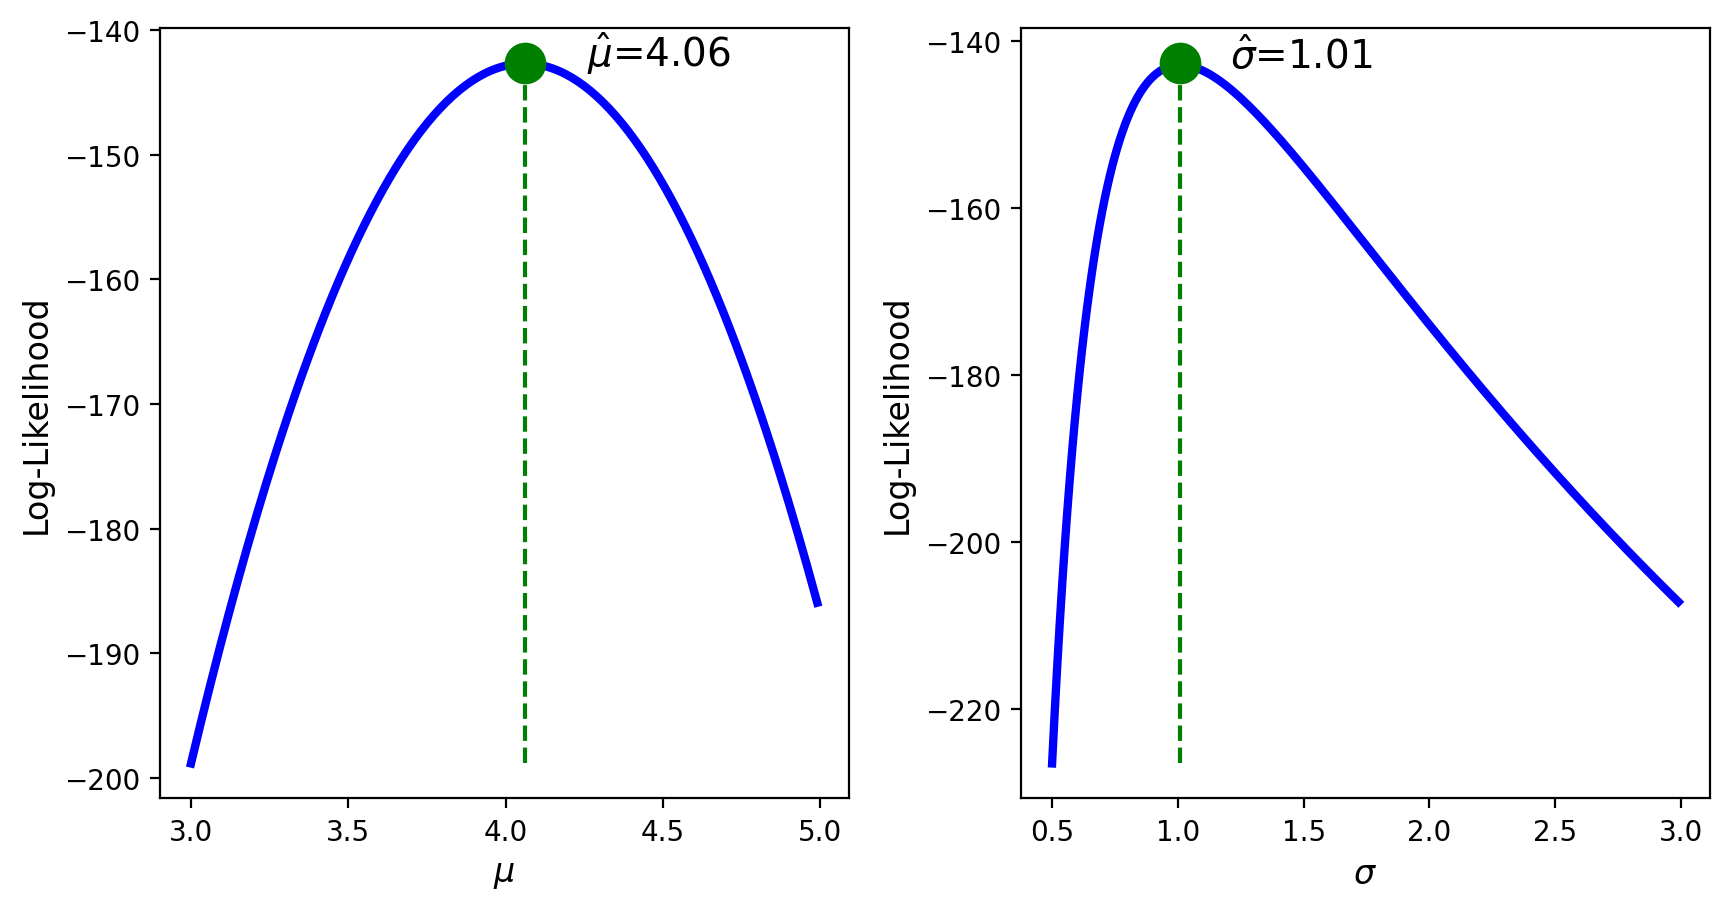

In [16]:
# make line plots
f, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
plt.subplots_adjust(wspace=.25,hspace=0)
axs[0].plot(vec_mu, normloglik(data,vec_mu,sigma), lw = 3, color = 'blue')
axs[0].set_xlabel('$\mu$',size=12)
axs[0].set_ylabel('Log-Likelihood',size=12)
ymin = np.min(normloglik(data,vec_mu,sigma))
axs[0].vlines(x = mu_hat, ymin = ymin, ymax = llik, linestyles = 'dashed', color = 'g')
axs[0].plot(mu_hat, llik, 'o', color = 'g', markersize = 14, clip_on = False)
axs[0].text(mu_hat+0.2, llik-1, r'$\hat{\mu}$=%.2f'%mu_hat, size = 14, ha = 'left', va = 'bottom')


axs[1].plot(vec_sigma, normloglik(data,mu,vec_sigma), lw = 3, color = 'blue')
axs[1].set_xlabel('$\sigma$',size=12)
axs[1].set_ylabel('Log-Likelihood',size=12)
ymin = np.min(normloglik(data,mu,vec_sigma))
axs[1].vlines(x = sig_hat, ymin = ymin, ymax = llik, linestyles = 'dashed', color = 'g')
axs[1].plot(sig_hat, llik, 'o', color = 'g', markersize = 14, clip_on = False)
axs[1].text(sig_hat+0.2, llik-1.5, r'$\hat{\sigma}$=%.2f'%sig_hat, size = 14, ha = 'left', va = 'bottom')


plt.show()

### Summary Parameter Estimation
- Parameter estimation is inference about a population parameter based on a sample statistic. Model fitting is a closely related concept: it implies finding the parameters of a distribution given that we know some data from it.

- The maximum likelihood principle is often the preferred way to estimate parameters. The maximum likelihood estimate (MLE) is that value of the parameter that maximizes the probability of the data as a function of that parameter (i.e., the likelihood). The MLE can be found as follows:
1. Compute the likelihood function;
2. Compute the log-likelihood function;
3. Take the derivative of the log-likelihood function w.r.t. the unknown parameter;
4. Set the derivative to zero to find the MLE;
5. Optionally check the sign of the second derivative or use the graph to confirm that the critical point is a maximum.

- To evaluate an estimator we use: 
1. Bias: it measures the expected deviation from the true value of the parameter. 
2. Variance: it measures how much the estimator can vary as a function of the data sample. 
3. Mean Squared Error: it combines bias and variance. 
4. Consistency: it evaluates whether the estimate converges to the true value of the parameter.